#### `Q1`: What is the mathematical formula for a linear SVM?




* The mathematical formujl for a linear SVM is:

* 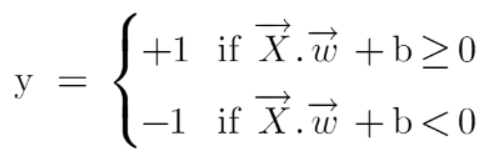


* if you think of X.W as a function of x: f(x), then the above formula can be interpreted as:
   >If f(x) ≥ 0, the new data point is classified as positive (belonging to the positive class)<br>if f(x) < 0, the new data point is classified as negative (belonging to the negative class).

#### `Q2`: What is the objective function of a linear SVM?







* The objective function of a linear SVM is:

* 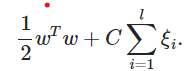

* 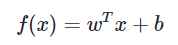

* where ||w||= w^Tw is the Euclidean norm of the weight vector w, b is the bias term, and yᵢ is the class label of the i-th data point, with yᵢ ∈ {-1, 1}.

#### `Q3`: What is the kernel trick in SVM?

* The kernel trick is a technique used in Support Vector Machines (SVM) to transform data from a lower-dimensional space to a higher-dimensional space without explicitly computing the coordinates of the data in the higher-dimensional space. This technique allows SVM to effectively deal with non-linearly separable datasets.

* The idea behind the kernel trick is to replace the dot product between two vectors in the higher-dimensional space with a kernel function that computes the similarity between the two vectors in the original lower-dimensional space. This means that SVM can operate in the higher-dimensional space without explicitly computing the coordinates of the data in that space.

#### `Q4`: What is the role of support vectors in SVM Explain with example.



* Support vectors are the data points that lie closest to the decision boundary (hyperplane) in a Support Vector Machine (SVM) algorithm. They play a critical role in determining the location and orientation of the decision boundary.

* In an SVM algorithm, the goal is to find a hyperplane that separates the different classes of data with the maximum possible margin. The margin is the distance between the hyperplane and the nearest data points from each class. The support vectors are the data points that lie on the margin, meaning they have the smallest margin distance among all the data points in the training set.

* During the training phase of the SVM algorithm, the support vectors are identified and used to define the decision boundary. The decision boundary is positioned in such a way that it maximizes the margin between the classes while still correctly classifying the training data.

* For example, suppose we have a binary classification problem with two features x1 and x2, and the SVM algorithm finds two support vectors and one data point  for each class:


* 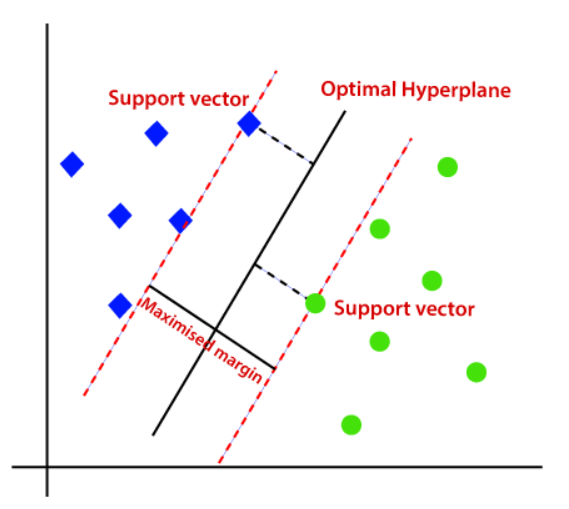


* The algorithm finds the decision boundary that maximizes the margin between the classes while ensuring that all the data points are correctly classified. In this case, the decision boundary is a straight line that passes through the middle of the margin between the support vectors for each class.


#### `Q5`: Illustrate with examples and graphs of Hyperplane, Marginal plane, Soft margin and Hard margin in SVM?
* **Hyperplane:**<br>
* The hyperplane is the decision boundary that separates the two classes. In a two-dimensional space, the hyperplane is a line. The following graph shows an example of a hyperplane that separates the green and blue classes:

* 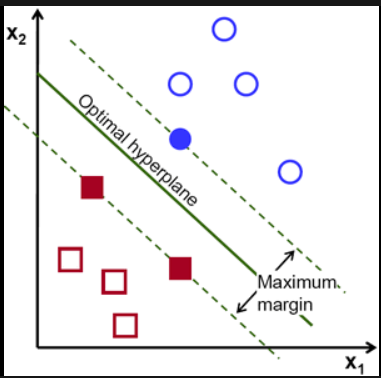

* **Hyperplane:**<br>
* The hyperplane is the decision boundary that separates the two classes. In a two-dimensional space, the hyperplane is a line. The following graph shows an example of a hyperplane that separates the green and blue classes:

* 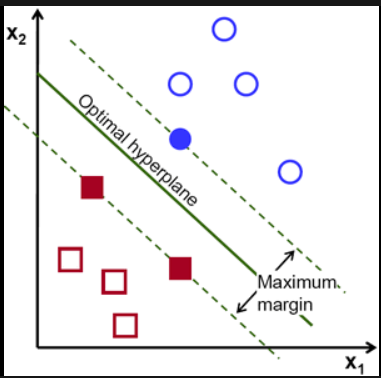

* **Marginal plane:**<br>
* The marginal plane is a plane that is parallel to the hyperplane and is located at a distance of 1/magnitude(w) from the hyperplane, where w is the weight vector of the hyperplane. The marginal plane is used to compute the margin of the hyperplane, which is the distance between the hyperplane and the closest data point of either class. The following graph shows an example of a marginal plane (the dotted blue lines):
* 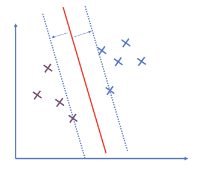

* **Soft margin:**<br>
* In real-world applications, it is rare to have a linearly separable dataset, which means that the hyperplane cannot perfectly separate the two classes. In such cases, we use a soft margin, which allows some misclassification errors to occur. The soft margin allows some data points to be on the wrong side of the margin, but penalizes them for being too far from the margin. The following graph shows an example of a soft margin:

* 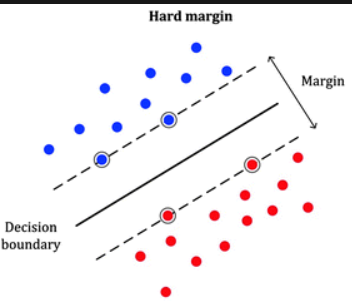

* **Hard margin:**<br>
* In some cases, it may be possible to find a hyperplane that perfectly separates the two classes without any misclassification errors. This is called a hard margin, and it only works for linearly separable datasets. The following graph shows an example of a hard margin:

* 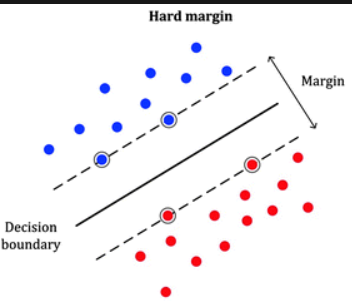

# Question No. 6:
SVM Implementation through Iris dataset.
- Load the iris dataset from the scikit-learn library and split it into a training set and a testing setl
- Train a linear SVM classifier on the training set and predict the labels for the testing setl
- Compute the accuracy of the model on the testing setl
- Plot the decision boundaries of the trained model using two of the featuresl
- Try different values of the regularisation parameter C and see how it affects the performance of the model.

In [8]:
from sklearn import datasets
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

In [9]:
iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=43)

In [12]:
clf = LinearSVC(random_state=43)
clf.fit(x_train, y_train)

LinearSVC(random_state=43)

In [13]:
y_pred = clf.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


### Remarks :
- The model is clearly overfitting. 
- so now i am trying with different values of the regularization parameter c

In [20]:
c = [0.1,0.5,1,10,100,1000]
for c_val in c:
  clf = LinearSVC(C=c_val)
  clf.fit(x_train, y_train)
  y_pred = clf.predict(x_test)
  print(f"Accuracy at C={c_val}:", accuracy_score(y_test, y_pred))

Accuracy at C=0.1: 1.0
Accuracy at C=0.5: 1.0
Accuracy at C=1: 1.0
Accuracy at C=10: 1.0
Accuracy at C=100: 1.0
Accuracy at C=1000: 0.9333333333333333


### Remarks on different values of the C parameter:
- now model works fine on c=1000 , Looks like the model finally overcame the overfitting issue at higher value of C (1000)